# Setup

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [2]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import importlib, os

from lib import path_tools as pt
from lib import import_data
from lib import analysis

# XRD

In [8]:
pt.wipe_scrap()

# Set the technique we're working with today
# Valid values: 'xrd', 'pl', 'uvvis'
flag = "xrd"

In [9]:
importlib.reload(import_data)

<module 'lib.import_data' from '/home/tomas/Documents/sciencetools_py/lib/import_data.py'>

In [10]:
# Identify the folder(s) where the raw, original data is
# Use a list to store multiple directories that you want ready to plot
XRD_data = {}

# ETB-046 Variables
samples_dir = {
    "etb069": "200123 ETB-069 MAPbI on glass FF DMF/",
    "etb070": "200124 ETB-070 MAPbI on glass FF DMF/",
    "etb071": "200125 ETB-071 MAPbI on glass FF DMF/",   
}

for run_ID in samples_dir.keys():
    XRD_data[run_ID] = import_data.init(flag, samples_dir[run_ID])

Creating new local data folder.
Creating new local data folder.
Creating new local data folder.


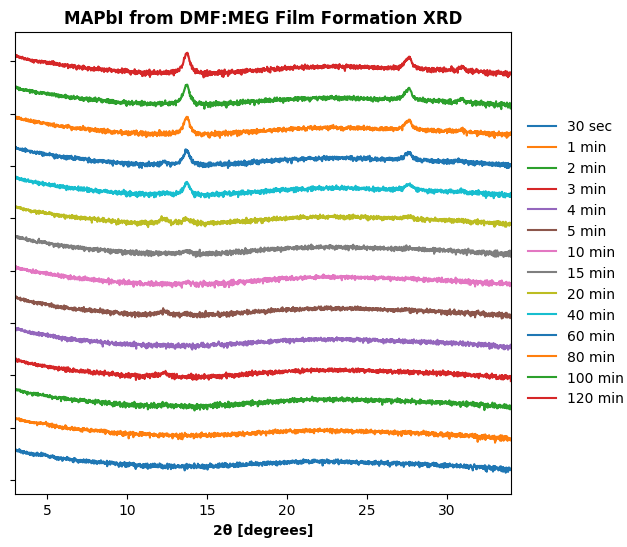

In [15]:
fig = plt.figure(1, figsize=[6.4, 6])
fig_ax = plt.gca()

offset = 0
lbl = None

master_cypher = (
    "30sec",
    "1min",
    "2min",
    "3min",
    "4min",
    "5min",
    "10min",
    "15min",
    "20min",
    "40min",
    "60min",
    "80min",
    "100min",
    "120min",
)

for sample_ID in master_cypher:
    for run_ID in samples_dir.keys():
        if sample_ID in XRD_data[run_ID].keys():
            samplemax = max(np.log10(XRD_data[run_ID][sample_ID]["counts"]))
            
            if "min" in sample_ID:
                lbl = sample_ID.replace("min", " min")
            elif "sec" in sample_ID:
                lbl = sample_ID.replace("sec", " sec")
            
            plt.figure(1)
            plt.plot(XRD_data[run_ID][sample_ID]["2theta"], np.log10(XRD_data[run_ID][sample_ID]["counts"]) + offset,
                     label=lbl)
            
            offset += samplemax
            
plt.style.use('default')

plt.xlabel("2θ [degrees]", weight="semibold")
# plt.ylabel("Counts", weight="semibold")
fig_ax.set_yticklabels([])
plt.xlim(min(XRD_data["etb069"]["1min"]["2theta"]), max(XRD_data["etb069"]["1min"]["2theta"]))

plt.title("MAPbI from DMF:MEG Film Formation XRD",weight="semibold")
plt.legend(loc='center left', bbox_to_anchor=(1.01, 0,.22,1),mode='expand', frameon=False)

In [13]:
fig.savefig("plots/final/XRD/MAPbI-DMF_all_stacked.png", dpi=200, format='png', bbox_inches='tight')

# PL

In [11]:
pt.wipe_scrap()

# Set the technique we're working with today
# Valid values: 'xrd', 'pl', 'uvvis'
flag = "pl"

In [10]:
importlib.reload(import_data)
importlib.reload(analysis)

<module 'lib.analysis' from '/home/tomas/Documents/sciencetools_py/lib/analysis.py'>

In [12]:
# Identify the folder(s) where the raw, original data is
# Use a list to store multiple directories that you want ready to plot
pl_data = {}

# ETB-046 Variables
samples_dir = {
    "etb069": "200129 ETB-069 MAPbI on glass FF DMF/",
    "etb070": "200129 ETB-070 MAPbI on glass FF DMF/",
    "etb071": "200129 ETB-071 MAPbI on glass FF DMF/",   
}

for run_ID in samples_dir:
    pl_data[run_ID] = import_data.init(flag, samples_dir[run_ID])

Creating new local data folder.
Creating new local data folder.
Creating new local data folder.


/home/tomas/Documents/sciencetools_py/lib/analysis.py:14: FutureWarning: `item` has been deprecated and will be removed in a future version
  while (input_df.iloc[current_index]['counts'].item() > (local_max['counts'] / 2)):
/home/tomas/Documents/sciencetools_py/lib/analysis.py:22: FutureWarning: `item` has been deprecated and will be removed in a future version
  while (input_df.iloc[current_index]['counts'].item() > (local_max['counts'] / 2)):
/home/tomas/Documents/sciencetools_py/lib/analysis.py:27: FutureWarning: `item` has been deprecated and will be removed in a future version
  fwhm = right_bound['wavelength'].item() - left_bound['wavelength'].item()
/home/tomas/Documents/sciencetools_py/lib/analysis.py:31: FutureWarning: `item` has been deprecated and will be removed in a future version
  max_location['wavelength'].item(),


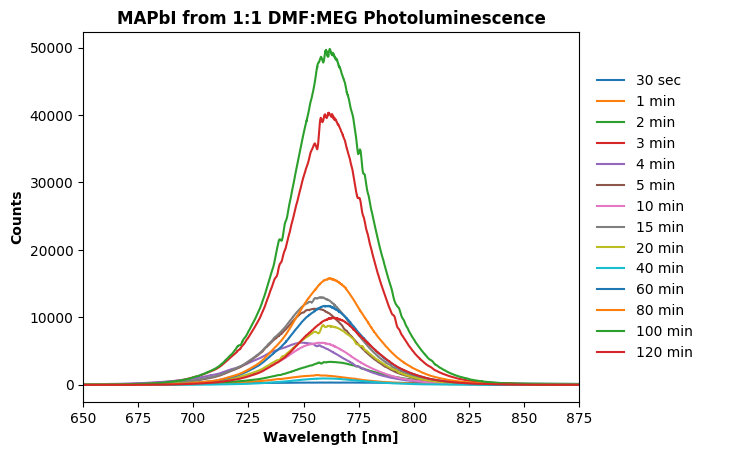

In [21]:
fig = plt.figure(1)
fig_ax = plt.gca()

lbl = None

master_cypher = (
    "30sec",
    "1min",
    "2min",
    "3min",
    "4min",
    "5min",
    "10min",
    "15min",
    "20min",
    "40min",
    "60min",
    "80min",
    "100min",
    "120min",
)

raw_analysis = []

for sample_ID in master_cypher:
    for run_ID in samples_dir.keys():
        if sample_ID in pl_data[run_ID].keys():
            raw_analysis.append(analysis.FWHM(flag, sample_ID, pl_data[run_ID][sample_ID]))
            
            if "min" in sample_ID:
                lbl = sample_ID.replace("min", " min")
            elif "sec" in sample_ID:
                lbl = sample_ID.replace("sec", " sec")
                
            if "C" in lbl:
                lbl = lbl.replace("C", "°C")
            
            plt.figure(1)
            plt.plot(pl_data[run_ID][sample_ID]["wavelength"], pl_data[run_ID][sample_ID]["counts"],
#                      abs(max(pl_data[run_ID][sample_ID]["counts"])),
                     label=lbl)
        else:
            pass

max_values = pd.DataFrame(data=raw_analysis,columns=['Sample', 'Max_Wavelength', 'Max_Value', 'FWHM'])

plt.style.use('default')

plt.xlabel("Wavelength [nm]", weight="semibold")
plt.ylabel("Counts", weight="semibold")
# fig_ax.set_yticklabels([])
# plt.xlim(min(pl_data["etb066"]["15min 50C"]["wavelength"]), max(pl_data["etb066"]["15min 50C"]["wavelength"]))
plt.xlim(650,875)

plt.title("MAPbI from 1:1 DMF:MEG Photoluminescence",weight="semibold")
plt.legend(loc='center left', bbox_to_anchor=(1.01, 0,.3,1),mode='expand', frameon=False)

In [22]:
fig.savefig("plots/final/PL/MAPbI-DMF_all.png", dpi=200, format='png', bbox_inches='tight')

In [23]:
max_values.to_csv('plots/final/PL/MAPbI-DMF_all.csv')

# UV-Vis

In [19]:
pt.wipe_scrap()

    # Set the technique we're working with today
# Valid values: 'xrd', 'pl', 'uvvis'
flag = "uvvis"

In [20]:
importlib.reload(import_data);

In [21]:
# Identify the folder(s) where the raw, original data is
# Use a dict to store multiple directories that you want ready to plot
uv_data = {}

samples_dir = {
    "etb069": "200129 ETB-069 MAPbI on glass FF DMF/",
    "etb070": "200129 ETB-070 MAPbI on glass FF DMF/",
    "etb071": "200129 ETB-071 MAPbI on glass FF DMF/",
}

for run_ID in samples_dir.keys():
    uv_data[run_ID] = import_data.init(flag, samples_dir[run_ID])

Creating new local data folder.
Creating new local data folder.
Creating new local data folder.


In [14]:
# Expression to find where index = X nm for normalizing later
uv_data["etb044"]['1min'].index[uv_data["etb044"]['1min']['wavelength'] == 550]

Int64Index([250], dtype='int64')

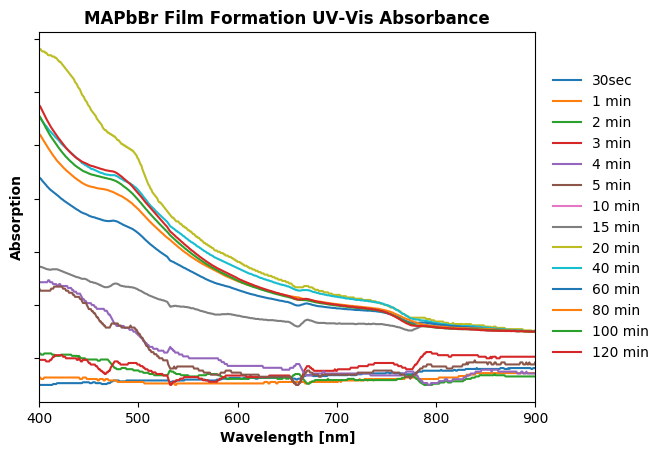

In [24]:
fig = plt.figure(1)
fig_ax = plt.gca()

plotted = None
localmax = 0
# Comment out any undersired samples
master_cypher = (
    "30sec",
    "1min",
    "2min",
    "3min",
    "4min",
    "5min",
    "10min",
    "15min",
    "20min",
    "40min",
    "60min",
    "80min",
    "100min",
    "120min",
)

# PUT THIS IN MAIN.PY LATER
# def sortsamples

for sample_ID in master_cypher:
    
    for run_ID in samples_dir.keys():
        if sample_ID in uv_data[run_ID].keys() and plotted != True:
            
#             localmax = uv_data[run_ID][sample_ID]["abs"].loc[50:120].max()
            
            plt.figure(1)
            plt.plot(uv_data[run_ID][sample_ID]["wavelength"], uv_data[run_ID][sample_ID]["abs"]/
                     abs(uv_data[run_ID][sample_ID]["abs"].min()),
#                      localmax,
                     label=sample_ID.replace("min", " min"))
            
            plotted = True
            localmax = 0
        else:
            pass
    
    plotted = False

plt.style.use('default')

plt.xlabel("Wavelength [nm]", weight="semibold")
plt.ylabel("Absorption", weight="semibold")
fig_ax.set_yticklabels([])
plt.xlim(min(uv_data["etb069"]["1min"]["wavelength"]), max(uv_data["etb069"]["1min"]["wavelength"]))

plt.title("MAPbBr Film Formation UV-Vis Absorbance",weight="semibold")
plt.legend(loc='center left', bbox_to_anchor=(1.01, 0,.22,1), mode='expand', frameon=False)

In [28]:
uv_data["etb045"]["4min"]["abs"].loc[50:120].max()

0.11800000000000001

In [18]:
fig.savefig("plots/191031/mapbbr_abs_all_normmin3.png", dpi=200, format='png', bbox_inches='tight')